# MLP, CNN 이해

- MNIST 이미지 인식
- GPU를 사용하려면 colab에서 실행

# import

In [ ]:
# 아래는 한번만 설치하면 됨
# !pip install tensorflow

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import layers
from keras import models

# MNIST 데이터

In [7]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [8]:
train_images.shape

(60000, 28, 28)

## 이미지 데이터 보기

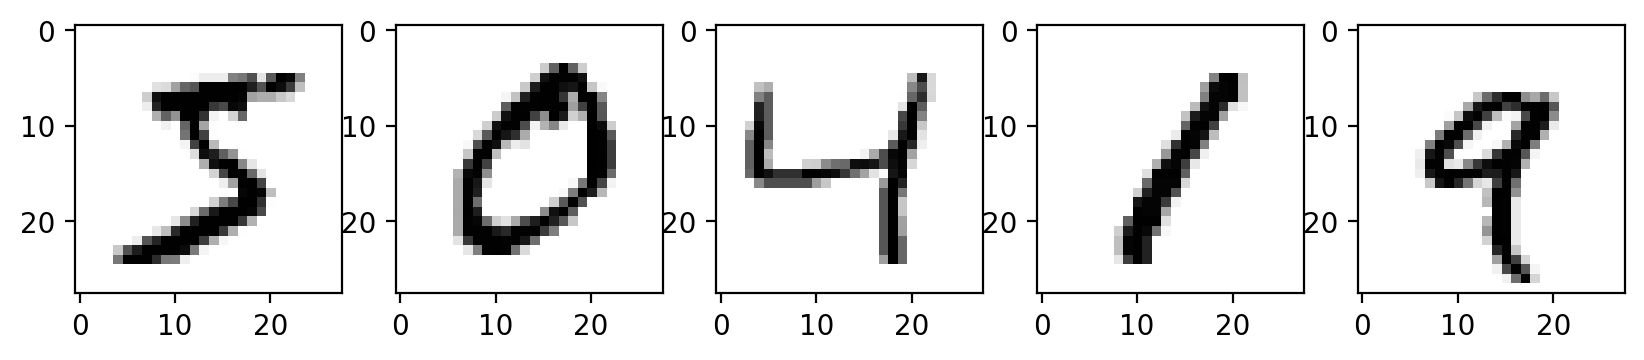

In [9]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))  #subplot 이미지를 작게 나눠라. 1열에 5개의 box가 있는 이미지로 나눠라.
for i in range(5):
    axes[i].imshow(train_images[i], cmap=plt.cm.binary)   #imshow 그림을 그려라. (매트릭스에 대해서)
plt.show()

In [6]:
train_labels[:5]   # 이 이미지를 주고 맞춰랑. 50419 5개를... /

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
#train_images[0] #5에 대한 값.
train_images[0].reshape(-1,28*28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
        126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  30,  36

# MLP 모델

- [MLP 동작 이해(playground)](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.30687&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)
- [MLP로 구현한 MNIST 인식 모델](https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project/notebook)
- 출력단은 10개의 점수를 얻은 후에 소프트맥스를 수행하여 확률을 예측했다
  - 10개의 클래스 확률을 얻었다

## MLP 입력 전처리
- MLP는 1차원 텐서 즉 벡터만 입력으로 받는다 (일렬 횡대 입력)
- 목적 변수(여기서는 0~9 의 숫자)는 원 핫 인코딩을 해야 하며 케라스가 제공하는 to_categorical를 사용한다 (get_dummies와 같은 역할 수행)
- 입력값은 0~1 사이로 min-max 스케일링은 한다

In [10]:
X_train = train_images.reshape(60000, 28*28)
X_train = X_train.astype('float32')/255

X_test = test_images.reshape(10000, 28*28)
X_test = X_test.astype('float32')/255

y_train_cat = to_categorical(train_labels) # 원핫인코딩
y_test_cat = to_categorical(test_labels)

In [13]:
print(X_train.shape)
y_train_cat[:3]

(60000, 784)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## MLP 모델 구현

In [14]:
model_m = models.Sequential()
model_m.add(layers.Dense(100, activation='relu', input_shape = (28*28,)))  #input이 28*28(748개)가 들어오는데 100개의 값으로 줄이는 Layer를 만들어주라
model_m.add(layers.Dense(100, activation='relu'))                          #이 100개짜리를 다시 100개로 만드는 layer를 1개더 추가
model_m.add(layers.Dense(10, activation='softmax'))                        #이 100개짜리는 10개로 줄여주라 using softmax(softmax activation function)
model_m.summary()
#현재 결과에 Pamater를 89610 개를 쓴 것. 이 값ㅇ느 작을 수록 좋음.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 89610 (350.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 조기 종료 조건
- 이포크 종료 조건을 keras.callbacks.EarlyStopping로 설정할 수 있다
- 아래는 총 이포크를 30회 진행하되 이포크가 3회 진행하는 동안 검증 데이터에 대해 정확도가 개선되지 않으면 종료하라는 뜻이다
 - 이 때 검증 데이터는 훈련 데이터중에 20%를 자체적으로 사용한다
 - 아래에서 검증뎅터에 대한 성능이 떨어지기 전에..종료해야함. (= 훈련 Data가 너무 많아도 안됨) =>Early Stopping

<img src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.24.12.png?raw=1' align='left' width=400>


In [21]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
 #최고의 Accracy를 구해도 최소 3번은 더 시도해봄. 만약 3번 더 해도 더 좋은 VAL_ACCURACY가 안 나오면 중단함.

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])  #분류모델
#model_m.compile(loss='mse', optimizer='adam', metrics=['accuracy'])  #분류모델->회귀모델 로 바꿀려면 loss function 을 MIN Square Error 로 준다.
# adam외에 다른 최적화 알고리즘으로 'rmsprop'도 널리 사용된다
# 레이블은 원 핫 인코딩된 y_train_cat을 사용해야 한다
# 10개의 값을 각각 주고 확률처럼 사용한다

h = model_m.fit(X_train,
                      y_train_cat,
                      batch_size=20,          #한번에 몇 개씩 테스트할 것인가.
                      epochs=30,              #30번을 돌려야하니까 이포크는 30으로 설정.
                      callbacks=callbacks_list,
                      validation_split=0.2,   #스스로 채점하는 데이터를 20%를 써라
                      verbose=1)

# 하단에 결과가 2400/2400 나오는 이유 : 6만개 자료 -> 0.2 제외한 0.8을 사용 -> 4만8천개 -> BATCH 사이즈가 20이니까. 2400 개 나옴

Epoch 1/30
2400/2400 [==============================] - 12s 4ms/step - loss: 0.4141 - accuracy: 0.8842 - val_loss: 0.2515 - val_accuracy: 0.9302
Epoch 2/30
2400/2400 [==============================] - 8s 3ms/step - loss: 0.2465 - accuracy: 0.9284 - val_loss: 0.2175 - val_accuracy: 0.9402
Epoch 3/30
2400/2400 [==============================] - 9s 4ms/step - loss: 0.2096 - accuracy: 0.9382 - val_loss: 0.1965 - val_accuracy: 0.9438
Epoch 4/30
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1862 - accuracy: 0.9450 - val_loss: 0.1817 - val_accuracy: 0.9486
Epoch 5/30
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1667 - accuracy: 0.9503 - val_loss: 0.1710 - val_accuracy: 0.9517
Epoch 6/30
2400/2400 [==============================] - 10s 4ms/step - loss: 0.1511 - accuracy: 0.9545 - val_loss: 0.1609 - val_accuracy: 0.9544
Epoch 7/30
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1382 - accuracy: 0.9577 - val_loss: 0.1562 - val_accurac

## fit 함수
- 매 이포크마다 실행 결과를 history 타입의 객체에 저장한다
- 이 객체에 손실함수와 성능평가 기록이 남아 있다

In [19]:
# 결과를 보는 함수 정의
def show_4_graphs(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

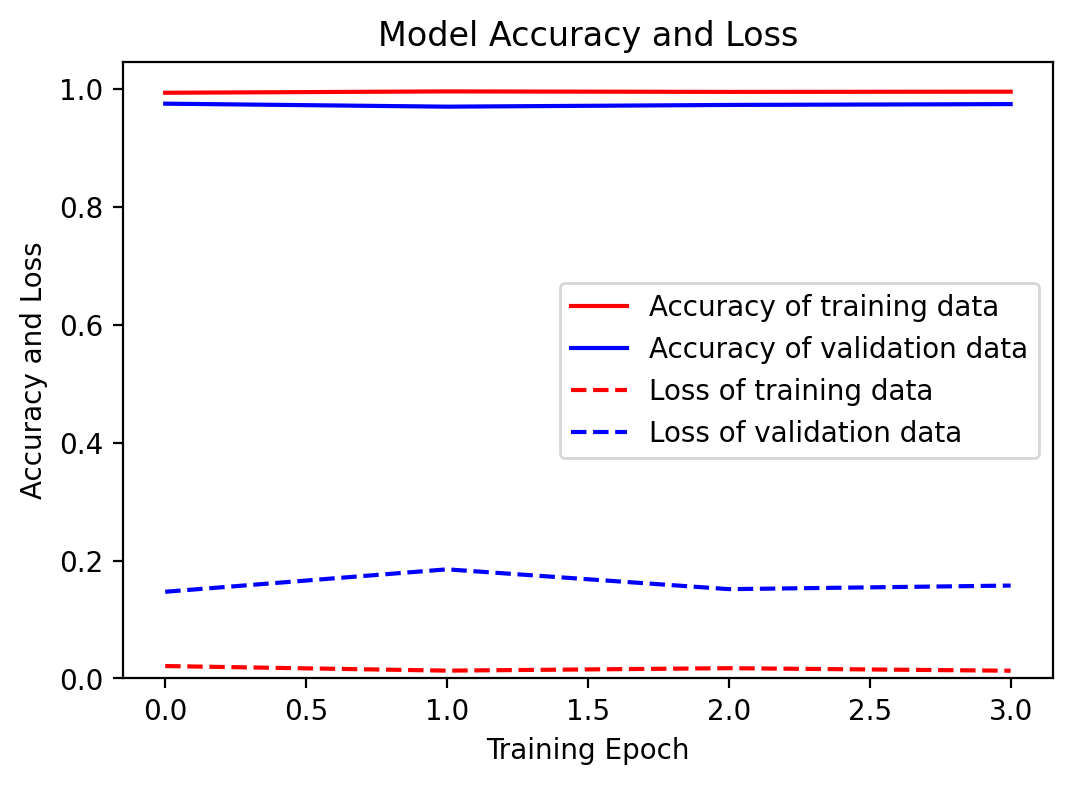

In [20]:
show_4_graphs(h)

## 성능 평가
- 검증데이터에 대한 평가는 evaluate()로 수행한다
- loss와 accuracy를 리턴한다

In [ ]:
test_loss, test_acc = model_m.evaluate(X_test, y_test_cat)
print('loss, acc = ',test_loss, test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1262 - accuracy: 0.9763
loss, acc =  0.12620161473751068 0.9763000011444092


##  예측에 사용하기
- predict()함수를 호출하면 클래스 확률을 보여준다
- 10개의 클래스 확률중에 어떤 클래스의 확률이 가장 큰지는 agrmax()로 찾는다

In [ ]:
model_m.predict(X_train[0:3]) #확률로 보여줌.

1/1 [==============================] - 0s 71ms/step


array([[9.6741753e-28, 7.5162668e-18, 1.1477957e-17, 1.9422335e-04,
        1.2472462e-26, 9.9980575e-01, 3.3885531e-28, 1.8414593e-14,
        7.6802944e-16, 2.1555342e-14],
       [1.0000000e+00, 1.7288296e-20, 5.1600878e-14, 2.3989917e-17,
        3.7603152e-19, 2.5055706e-18, 1.9952998e-18, 1.6575364e-16,
        1.1601695e-17, 7.1211551e-15],
       [1.7137611e-19, 5.9756904e-17, 2.3846015e-11, 7.4708491e-16,
        1.0000000e+00, 9.7738097e-20, 5.0508559e-20, 2.3325888e-12,
        2.9186587e-13, 2.3259372e-09]], dtype=float32)

In [ ]:
np.argmax(model_m.predict(X_train[0:5]), axis=1)  #10개의 숫자 CLASS 중, 가장 큰 값(확률)이 몇 번 째에 들어있느냐 ...

1/1 [==============================] - 0s 19ms/step


array([5, 0, 4, 1, 9], dtype=int64)

# CNN 모델
- CNN은 입력으로 4차원 구조를 필요로 한다(#신경망들은 모두 다 최소 3차원 이상을 필요로 함)
 - (샘플수, 가로, 세로, 특성수)
- 구조를 맞추기 위해서 reshape를 사용한다
- [CNN 모델을 사용한 MNIST 인식](https://towardsdatascience.com/mnist-handwritten-digits-classification-using-a-convolutional-neural-network-cnn-af5fafbc35e9)

In [11]:
X_train_cnn = train_images.reshape(-1,28,28,1)  #끝에 1을 넣어서 차원을 늘려좀.  나머지 앞의 세계는 사진에 대한 RGB 값.
X_test_cnn = test_images.reshape(-1,28,28,1)    #끝에 1을 넣어서 차원을 늘려줌.

In [13]:
X_test_cnn

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [12]:
from keras import layers
from keras import models

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(32, (3,3), padding="same", activation='relu', input_shape = (28, 28,1)))  #2D 차원으로 컨버전을 하는데, #padding 옆으로 채우고?, #필터는 32개
model_cnn.add(layers.MaxPooling2D((2,2))) #MAXpooling 을 2,2 매트릭스로 줄이고.

model_cnn.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))

model_cnn.add(layers.Flatten())  #MLP를 사용하기 위해 일렬횡대로 세움.
model_cnn.add(layers.Dense(128, activation='relu'))  #Layer Hidden 1개 추가
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.summary()

#결과에 대한 Parameter가 42만개.
#Conv2D의 Parameter가 왜 320개인가.. 필터?셀? 1개는 3*3. 이게 32장 있음. 3*3*32 + 바이오스 32 = 320

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)              

In [14]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

model_cnn.compile(loss='categorical_crossentropy',  #Loss 손실함수 변경에 따라 회계모델, 분류모델 구분가능. 현재는 분류모델.
                optimizer='adam', metrics=['accuracy'])
# 다른 최적화 알고리즘 'rmsprop'
# 레이블로 원 핫 인코딩을 사용해야 한다
h = model_cnn.fit(X_train_cnn,
                      y_train_cat,
                      batch_size=20,
                      epochs=30,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

# loss : 훈련데이터에 대한 손실loss
# val_loss :  검증데이터에 대한 손실loss
# 훈련데이터는 양이 많으면 많을 수록 성능이 올라가고 손실이 줄어듬
# 검증데이터는 양이 많으면 어느 순간(과대적합), 손실함수가 내려가다가 올라감. 그리고 성능이 올라가다가 내려감.
# 성능지표 = 사고를 줄임, 손실함수 = 과속을 하면 벌금을 내라함.

Epoch 1/30
2400/2400 [==============================] - 22s 4ms/step - loss: 0.2663 - accuracy: 0.9501 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 2/30
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0705 - accuracy: 0.9785 - val_loss: 0.0745 - val_accuracy: 0.9775
Epoch 3/30
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0520 - accuracy: 0.9834 - val_loss: 0.0802 - val_accuracy: 0.9808
Epoch 4/30
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0421 - accuracy: 0.9875 - val_loss: 0.0700 - val_accuracy: 0.9829
Epoch 5/30
2400/2400 [==============================] - 10s 4ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.0694 - val_accuracy: 0.9826
Epoch 6/30
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.0611 - val_accuracy: 0.9858
Epoch 7/30
2400/2400 [==============================] - 11s 4ms/step - loss: 0.0284 - accuracy: 0.9920 - val_loss: 0.0618 - val_ac

In [18]:
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test_cat)
print('test_acc = ',test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0797 - accuracy: 0.9854
test_acc =  0.9854000210762024


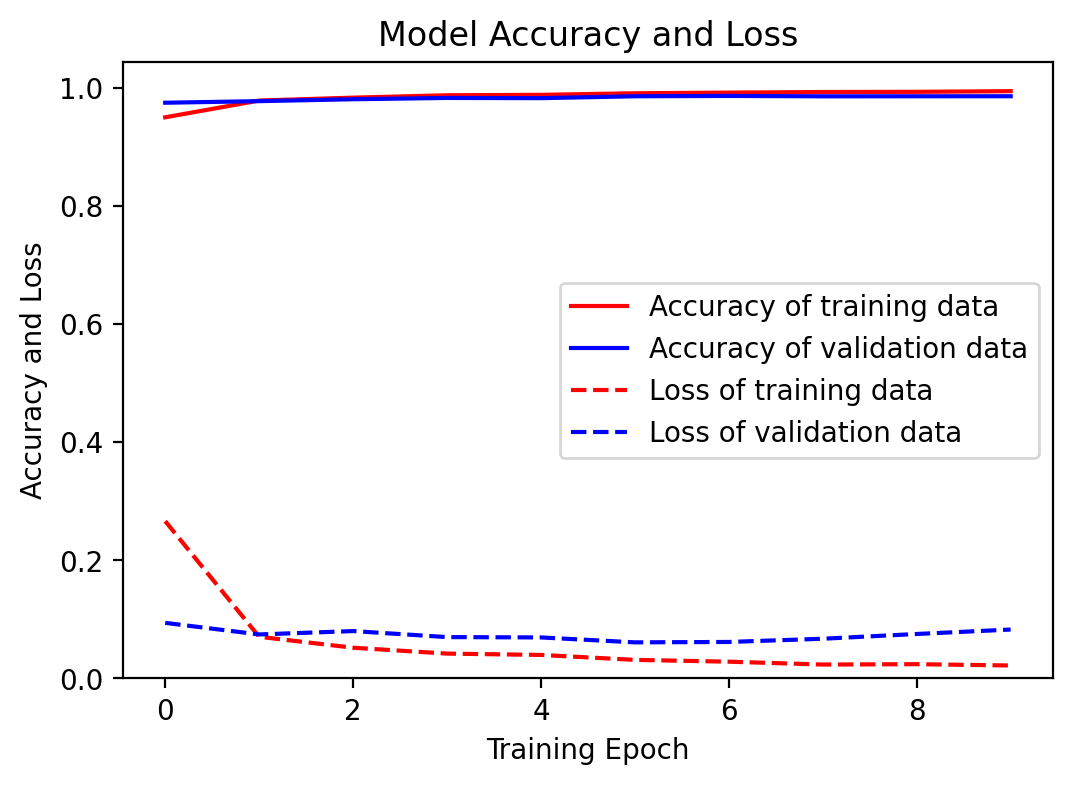

In [20]:
show_4_graphs(h)

# 신경망을 이용한  회귀 예측
- 신경망의 출력단을 다음과 같이 작성하면 회귀예측 모델이 된다 (softmax를 호출하면 분류 모델이다)
  - model.add(layers.Dense(1))
- 목적 변수 2개를 예측하는 경우
  - model.add(layers.Dense(2))

# (실습) 모델 최소화

- 정확도가 96% 이상이 되는 모델을 만들되 가능하면 간단한 모델, 즉, 파라미터수가 가능한 적은 모델을 만드시오

In [12]:
#MLP
 for i in range(10,90,10) :
    model_m = models.Sequential()
    model_m.add(layers.Dense(i, activation='relu', input_shape = (28*28,)))  #input이 28*28(748개)가 들어오는데 100개의 값으로 줄이는 Layer를 만들어주라
    #model_m.add(layers.Dense(i, activation='relu'))                          #이 100개짜리를 다시 100개로 만드는 layer를 1개더 추가
    model_m.add(layers.Dense(10, activation='softmax'))                        #이 100개짜리는 10개로 줄여주라 using softmax(softmax activation function)
    model_m.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                15700     
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 


In [22]:
  model_m = models.Sequential()
  model_m.add(layers.Dense(20, activation='relu', input_shape = (28*28,)))  #input이 28*28(748개)가 들어오는데 100개의 값으로 줄이는 Layer를 만들어주라
  #model_m.add(layers.Dense(i, activation='relu'))                          #이 100개짜리를 다시 100개로 만드는 layer를 1개더 추가
  model_m.add(layers.Dense(10, activation='softmax'))                        #이 100개짜리는 10개로 줄여주라 using softmax(softmax activation function)
  model_m.summary()


  #Layer 를 늘리면 복잡한 것을 잘 찾을 수 잇음
  #Cell 수를 늘리는 건 디테일함을 더 보기위한 것.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 20)                15700     
                                                                 
 dense_21 (Dense)            (None, 10)                210       
                                                                 
Total params: 15910 (62.15 KB)
Trainable params: 15910 (62.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
  callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]
    #최고의 Accracy를 구해도 최소 3번은 더 시도해봄. 만약 3번 더 해도 더 좋은 VAL_ACCURACY가 안 나오면 중단함.

  model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])  #분류모델
   # model_m.compile(loss='mse', optimizer='adam', metrics=['accuracy'])  #분류모델->회귀모델 로 바꿀려면 loss function 을 MIN Square Error 로 준다.
   # adam외에 다른 최적화 알고리즘으로 'rmsprop'도 널리 사용된다
   # 레이블은 원 핫 인코딩된 y_train_cat을 사용해야 한다
   # 10개의 값을 각각 주고 확률처럼 사용한다

  h = model_m.fit(X_train,
                  y_train_cat,
                  batch_size=20,          #한번에 몇 개씩 테스트할 것인가.
                  epochs=30,              #30번을 돌려야하니까 이포크는 30으로 설정.
                  callbacks=callbacks_list,
                  validation_split=0.2,   #스스로 채점하는 데이터를 20%를 써라
                  verbose=1)


Epoch 1/30
2400/2400 [==============================] - 9s 3ms/step - loss: 0.3904 - accuracy: 0.8894 - val_loss: 0.2285 - val_accuracy: 0.9348
Epoch 2/30
2400/2400 [==============================] - 9s 4ms/step - loss: 0.2223 - accuracy: 0.9354 - val_loss: 0.1945 - val_accuracy: 0.9436
Epoch 3/30
2400/2400 [==============================] - 8s 4ms/step - loss: 0.1881 - accuracy: 0.9442 - val_loss: 0.1888 - val_accuracy: 0.9459
Epoch 4/30
2400/2400 [==============================] - 8s 3ms/step - loss: 0.1681 - accuracy: 0.9506 - val_loss: 0.1690 - val_accuracy: 0.9506
Epoch 5/30
2400/2400 [==============================] - 9s 4ms/step - loss: 0.1541 - accuracy: 0.9546 - val_loss: 0.1722 - val_accuracy: 0.9506
Epoch 6/30
2400/2400 [==============================] - 10s 4ms/step - loss: 0.1435 - accuracy: 0.9576 - val_loss: 0.1689 - val_accuracy: 0.9510
Epoch 7/30
2400/2400 [==============================] - 8s 4ms/step - loss: 0.1351 - accuracy: 0.9594 - val_loss: 0.1736 - val_accuracy

In [44]:
#CNN 모델로 96% Accuracy 로 Parameter를 40만개에서 -> 몇 천개로 줄일 수 잇는 확인할 것.
#Dense를 줄이던지, Cell수를 줄이던지..


X_train_cnn = train_images.reshape(-1,28,28,1)  #끝에 1을 넣어서 차원을 늘려좀.  나머지 앞의 세계는 사진에 대한 RGB 값.
X_test_cnn = test_images.reshape(-1,28,28,1)    #끝에 1을 넣어서 차원을 늘려줌.

from keras import layers
from keras import models

model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(6, (3,3), padding="same", activation='relu', input_shape = (28, 28,1)))  #2D 차원으로 컨버전을 하는데, #padding 옆으로 채우고?, #필터는 32개
model_cnn.add(layers.MaxPooling2D((2,2))) #MAXpooling

model_cnn.add(layers.Conv2D(6, (3,3), padding="same", activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))

model_cnn.add(layers.Conv2D(6, (3,3), padding="same", activation='relu'))
model_cnn.add(layers.MaxPooling2D((2,2)))

model_cnn.add(layers.Flatten())  #MLP를 사용하기 위해 일렬횡대로 세움.
#model_cnn.add(layers.Dense(40, activation='relu'))  #Layer Hidden 1개 추가
model_cnn.add(layers.Dense(10, activation='softmax'))

model_cnn.summary()

#결과에 대한 Parameter를 3000개 미만으로 떨어뜨려보십시다.
#Pamater가 많으면 계산이 복잡하다는 거임. Pamater가 많으면 복잡하다는 말. Parameter가 많다고 좋은 건 아님...
#Conv2D의 Parameter가 왜 320개인가.. 필터?셀? 1개는 3*3. 이게 32장 있음. 3*3*32 + 바이오스 32 = 320




Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 14, 14, 6)         0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 6)         330       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 7, 7, 6)           0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 7, 7, 6)           330       
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 3, 3, 6)         

In [45]:
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)]

model_cnn.compile(loss='categorical_crossentropy',  #Loss 손실함수 변경에 따라 회계모델, 분류모델 구분가능. 현재는 분류모델.
                optimizer='adam', metrics=['accuracy'])
# 다른 최적화 알고리즘 'rmsprop'
# 레이블로 원 핫 인코딩을 사용해야 한다
h = model_cnn.fit(X_train_cnn,
                      y_train_cat,
                      batch_size=20,
                      epochs=30,
                      callbacks=callbacks_list,
                      validation_split=0.2,
                      verbose=1)

# loss : 훈련데이터에 대한 손실loss
# val_loss :  검증데이터에 대한 손실loss
# 훈련데이터는 양이 많으면 많을 수록 성능이 올라가고 손실이 줄어듬
# 검증데이터는 양이 많으면 어느 순간(과대적합), 손실함수가 내려가다가 올라감. 그리고 성능이 올라가다가 내려감.
# 성능지표 = 사고를 줄임, 손실함수 = 과속을 하면 벌금을 내라함.


Epoch 1/30
2400/2400 [==============================] - 14s 5ms/step - loss: 1.0022 - accuracy: 0.7146 - val_loss: 0.2269 - val_accuracy: 0.9291
Epoch 2/30
2400/2400 [==============================] - 12s 5ms/step - loss: 0.2057 - accuracy: 0.9355 - val_loss: 0.1480 - val_accuracy: 0.9540
Epoch 3/30
2400/2400 [==============================] - 12s 5ms/step - loss: 0.1411 - accuracy: 0.9567 - val_loss: 0.1176 - val_accuracy: 0.9633
Epoch 4/30
2400/2400 [==============================] - 12s 5ms/step - loss: 0.1151 - accuracy: 0.9639 - val_loss: 0.1097 - val_accuracy: 0.9650
Epoch 5/30
2400/2400 [==============================] - 12s 5ms/step - loss: 0.1006 - accuracy: 0.9686 - val_loss: 0.0946 - val_accuracy: 0.9717
Epoch 6/30
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0933 - accuracy: 0.9698 - val_loss: 0.0947 - val_accuracy: 0.9707
Epoch 7/30
2400/2400 [==============================] - 12s 5ms/step - loss: 0.0871 - accuracy: 0.9722 - val_loss: 0.0832 - val_ac